# Construire une  pipeline de transformation de donnée 
Ce notebook utilise l'architecture Medallion qui permet d'améliorer la qualité des données en les faisant passer à travers trois couches : Bronze (données brutes), Silver (données nettoyées) et Gold (données finales prêtes à l'utilisation).
Architecture Medallion : https://drive.google.com/file/d/1Zn0mfRxOiXjwnwQX4cd0-MrW42zHjNvl/view?usp=sharing



### Data set from  databricks-datasets
Table Bronze : Ingestion des données brutes
À ce niveau, les données brutes des trajets en taxi sont ingérées, avec un contrôle basique de qualité des données pour s'assurer que les distances des trajets sont positives.

In [0]:
%fs ls "/databricks-datasets/"

path,name,size,modificationTime
dbfs:/databricks-datasets/COVID/,COVID/,0,1732447790911
dbfs:/databricks-datasets/README.md,README.md,976,1561418533000
dbfs:/databricks-datasets/Rdatasets/,Rdatasets/,0,1732447790911
dbfs:/databricks-datasets/SPARK_README.md,SPARK_README.md,3359,1561418605000
dbfs:/databricks-datasets/adult/,adult/,0,1732447790911
dbfs:/databricks-datasets/airlines/,airlines/,0,1732447790912
dbfs:/databricks-datasets/amazon/,amazon/,0,1732447790912
dbfs:/databricks-datasets/asa/,asa/,0,1732447790912
dbfs:/databricks-datasets/atlas_higgs/,atlas_higgs/,0,1732447790912
dbfs:/databricks-datasets/bikeSharing/,bikeSharing/,0,1732447790912


In [0]:
%fs ls dbfs:/databricks-datasets/data.gov/

path,name,size,modificationTime
dbfs:/databricks-datasets/data.gov/README.md,README.md,400,1561422506000
dbfs:/databricks-datasets/data.gov/farmers_markets_geographic_data/,farmers_markets_geographic_data/,0,1732439308535
dbfs:/databricks-datasets/data.gov/irs_zip_code_data/,irs_zip_code_data/,0,1732439308535


### Couche Bronze

In [0]:
dbutils.fs.ls("dbfs:/databricks-datasets/data.gov/farmers_markets_geographic_data/data-001/")


[FileInfo(path='dbfs:/databricks-datasets/data.gov/farmers_markets_geographic_data/data-001/market_data.csv', name='market_data.csv', size=2609523, modificationTime=1561422507000)]

In [0]:
file_path = "dbfs:/databricks-datasets/data.gov/farmers_markets_geographic_data/data-001/market_data.csv"
market_data = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file_path)

market_data.printSchema()

root
 |-- FMID: integer (nullable = true)
 |-- MarketName: string (nullable = true)
 |-- Website: string (nullable = true)
 |-- Facebook: string (nullable = true)
 |-- Twitter: string (nullable = true)
 |-- Youtube: string (nullable = true)
 |-- OtherMedia: string (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- zip: string (nullable = true)
 |-- Season1Date: string (nullable = true)
 |-- Season1Time: string (nullable = true)
 |-- Season2Date: string (nullable = true)
 |-- Season2Time: string (nullable = true)
 |-- Season3Date: string (nullable = true)
 |-- Season3Time: string (nullable = true)
 |-- Season4Date: string (nullable = true)
 |-- Season4Time: string (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Credit: string (nullable = true)
 |-- WIC: string (nullable = true)
 |-- WICca

In [0]:
spark.read

In [0]:
%python
df = spark.read \
  .option("header", True) \
  .option("inferSchema", True) \
  .csv("dbfs:/databricks-datasets/data.gov/farmers_markets_geographic_data/data-001/market_data.csv")

# display(df)


In [0]:
bronze_path = "/mnt/data/bronze/farmers_markets"

df.write.format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .save(bronze_path)

## Couche Silver

In [0]:
%python
# Nettoyage des données et suppression de colonnes inutiles

# Supprimer les colonnes inutiles
columns_to_drop = [
    "Youtube", "Twitter", "OtherMedia",
    "Season2Date", "Season2Time", 
    "Season3Date", "Season3Time", 
    "Season4Date", "Season4Time"
]
df_cleaned = df.drop(*columns_to_drop)

# Remplacer les valeurs nulles par des valeurs par défaut
df_filled = df_cleaned.fillna({
    "MarketName": "Unknown",
    "Website": "Unknown",
    "Facebook": "Unknown",
    "street": "Unknown",
    "city": "Unknown",
    "County": "Unknown",
    "State": "Unknown",
    "zip": "Unknown",
    "Season1Date": "Unknown",
    "Season1Time": "Unknown",
    "Location": "Unknown",
    # Remplir les champs numériques avec 0
    "x": 0.0,
    "y": 0.0
})

# display(df_filled)


In [0]:
silver_path = "/mnt/data/silver/farmers_markets"
df_filled.write.format("delta").mode("overwrite").save(silver_path)
# display(df_filled)

In [0]:
%python
# Séparation des données en plusieurs tables

# 1. Informations générales sur le marché
market_info = df_filled[[
    "FMID", "MarketName", "Website", "Facebook", "street", "city", "County", 
    "State", "zip", "Location"
]]

# 2. Coordonnées géographiques
geo_info = df_filled[["FMID", "x", "y"]]

# 3. Informations sur la saison
season_info = df_filled[["FMID", "Season1Date", "Season1Time"]]

# 4. Moyens de paiement acceptés
payment_info = df_filled[["FMID", "Credit", "WIC", "WICcash", "SFMNP", "SNAP"]]

# 5. Produits proposés
product_info = df_filled[[
    "FMID", "Organic", "Bakedgoods", "Cheese", "Crafts", "Flowers", "Eggs", 
    "Seafood", "Herbs", "Vegetables", "Honey", "Jams", "Maple", "Meat", 
    "Nursery", "Nuts", "Plants", "Poultry", "Prepared", "Soap", "Trees", 
    "Wine", "Coffee", "Beans", "Fruits", "Grains", "Juices", "Mushrooms", 
    "PetFood", "Tofu", "WildHarvested"
]]

# 6. Méta-informations
meta_info = df_filled[["FMID", "updateTime"]]

# display(market_info)
# display(geo_info)
# display(season_info)
# display(payment_info)
# display(product_info)
# display(meta_info)

## Couche Gold - Analyse et Modèle Analytique
Dans la couche Gold, nous allons transformer les données pour répondre à des questions métier spécifiques. Voici quelques analyses que nous pouvons effectuer :

Nombre de marchés par État
Produits les plus proposés par les marchés
Modes de paiement les plus acceptés

In [0]:
from pyspark.sql.functions import col, count

market_count_by_state = df_filled.groupBy('State').agg(count('FMID').alias('MarketCount'))
gold_path_state = "/mnt/data/gold/market_count_by_state"
market_count_by_state.write.format("delta").mode("overwrite").save(gold_path_state)

product_columns = [col for col in df_filled.columns if col in [
    "Organic", "Bakedgoods", "Cheese", "Crafts", "Flowers", "Eggs", "Seafood", "Herbs", "Vegetables",
    "Honey", "Jams", "Maple", "Meat", "Nursery", "Nuts", "Plants", "Poultry", "Prepared", "Soap", 
    "Trees", "Wine", "Coffee", "Beans", "Fruits", "Grains", "Juices", "Mushrooms", "PetFood", "Tofu",
    "WildHarvested"
]]
product_counts = []
for product in product_columns:
    count_product = df_filled.filter(col(product) == 'Y').count()
    product_counts.append((product, count_product))
product_counts_df = spark.createDataFrame(product_counts, ['Product', 'MarketCount'])
gold_path_products = "/mnt/data/gold/product_counts"
product_counts_df.write.format("delta").mode("overwrite").save(gold_path_products)

payment_columns = ["Credit", "WIC", "WICcash", "SFMNP", "SNAP"]
payment_counts = []
for payment in payment_columns:
    count_payment = df_filled.filter(col(payment) == 'Y').count()
    payment_counts.append((payment, count_payment))
payment_counts_df = spark.createDataFrame(payment_counts, ['PaymentType', 'MarketCount'])
gold_path_payments = "/mnt/data/gold/payment_counts"
payment_counts_df.write.format("delta").mode("overwrite").save(gold_path_payments)


In [0]:
from pyspark.sql.functions import col, count

market_count_by_state = market_info.groupBy('State').agg(count('FMID').alias('MarketCount'))

market_count_by_state.show()

gold_path_state = '/mnt/data/gold/market_count_by_state'
market_count_by_state.write.format('delta').mode('overwrite').save(gold_path_state)


+--------------------+-----------+
|               State|MarketCount|
+--------------------+-----------+
|                Utah|         41|
|              Hawaii|         97|
|           Minnesota|        189|
|                Ohio|        321|
|              Oregon|        171|
|            Arkansas|        100|
|               Texas|        205|
|        North Dakota|         65|
|        Pennsylvania|        303|
|         Connecticut|        158|
|            Nebraska|         97|
|             Vermont|         97|
|              Nevada|         39|
|         Puerto Rico|         41|
|          Washington|        169|
|            Illinois|        324|
|            Oklahoma|         69|
|      Virgin Islands|          4|
|             Unknown|          1|
|District of Columbia|         35|
+--------------------+-----------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import sum

product_columns = product_info.columns[1:] 

product_counts = []
for product in product_columns:
    count_product = product_info.filter(col(product) == 'Y').count()
    product_counts.append((product, count_product))

product_counts_df = spark.createDataFrame(product_counts, ['Product', 'MarketCount'])

product_counts_df.orderBy(col('MarketCount').desc()).show()

gold_path_products = '/mnt/data/gold/product_counts'
product_counts_df.write.format('delta').mode('overwrite').save(gold_path_products)


+----------+-----------+
|   Product|MarketCount|
+----------+-----------+
|Vegetables|       5074|
|Bakedgoods|       4572|
|     Honey|       4226|
|      Jams|       4194|
|     Herbs|       4146|
|    Fruits|       4028|
|      Eggs|       3799|
|   Flowers|       3616|
|    Plants|       3555|
|      Soap|       3425|
|    Crafts|       3149|
|  Prepared|       3144|
|      Meat|       2838|
|    Cheese|       2647|
|   Poultry|       2286|
|   Organic|       2149|
|     Maple|       1623|
|     Trees|       1528|
|    Coffee|       1504|
|      Nuts|       1493|
+----------+-----------+
only showing top 20 rows



In [0]:
payment_columns = payment_info.columns[1:]  

payment_counts = []
for payment in payment_columns:
    count_payment = payment_info.filter(col(payment) == 'Y').count()
    payment_counts.append((payment, count_payment))

payment_counts_df = spark.createDataFrame(payment_counts, ['PaymentType', 'MarketCount'])

payment_counts_df.orderBy(col('MarketCount').desc()).show()

gold_path_payments = '/mnt/data/gold/payment_counts'
payment_counts_df.write.format('delta').mode('overwrite').save(gold_path_payments)


+-----------+-----------+
|PaymentType|MarketCount|
+-----------+-----------+
|     Credit|       4341|
|      SFMNP|       2567|
|        WIC|       2459|
|       SNAP|       2402|
|    WICcash|       1204|
+-----------+-----------+



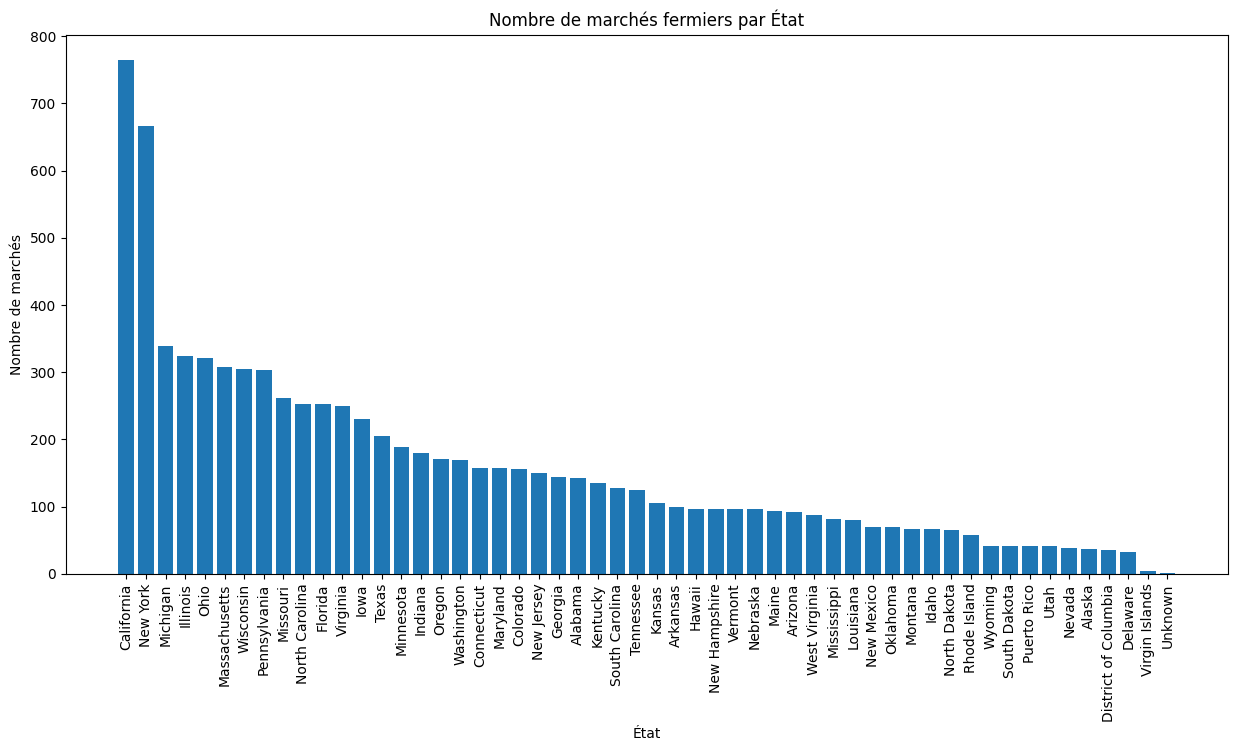

In [0]:
market_count_pd = market_count_by_state.toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
market_count_pd.sort_values('MarketCount', ascending=False, inplace=True)
plt.bar(market_count_pd['State'], market_count_pd['MarketCount'])
plt.title('Nombre de marchés fermiers par État')
plt.xlabel('État')
plt.ylabel('Nombre de marchés')
plt.xticks(rotation=90)
plt.show()


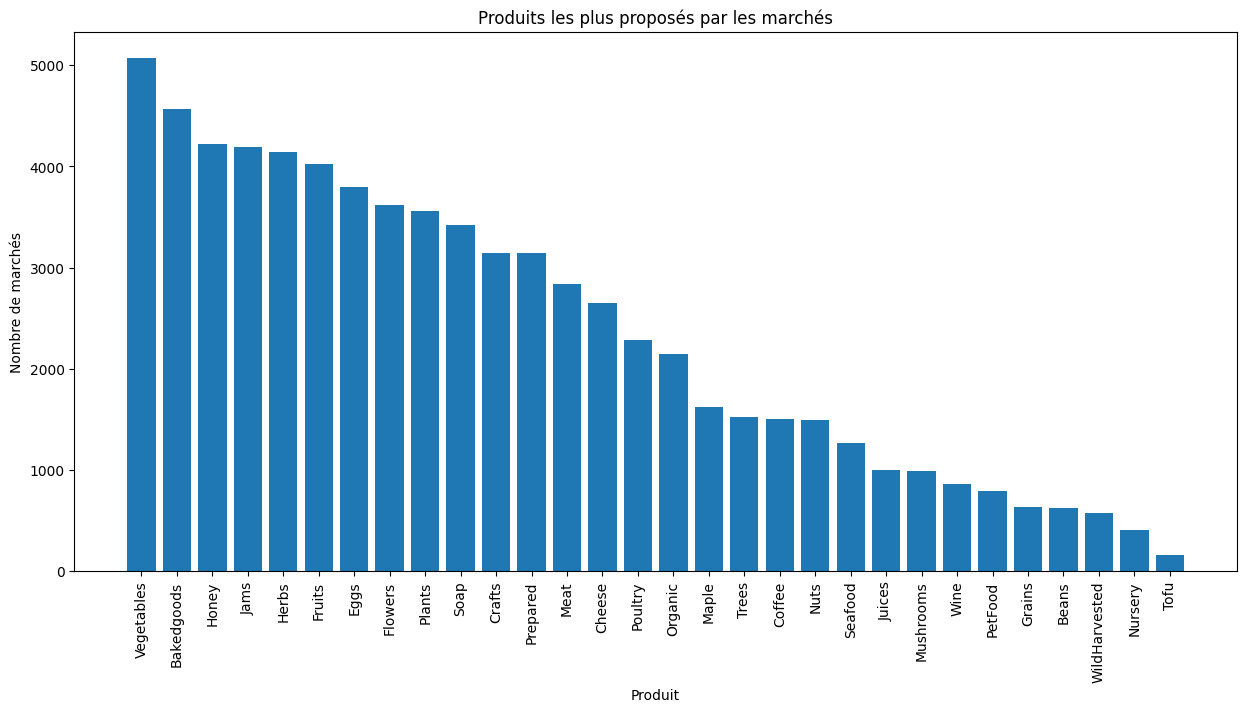

In [0]:
product_counts_pd = product_counts_df.toPandas()

plt.figure(figsize=(15,7))
product_counts_pd.sort_values('MarketCount', ascending=False, inplace=True)
plt.bar(product_counts_pd['Product'], product_counts_pd['MarketCount'])
plt.title('Produits les plus proposés par les marchés')
plt.xlabel('Produit')
plt.ylabel('Nombre de marchés')
plt.xticks(rotation=90)
plt.show()


In [0]:

gold_state_data = spark.read.format("delta").load(gold_path_state)
gold_state_data.show()

gold_products_data = spark.read.format("delta").load(gold_path_products)
gold_products_data.show()

gold_payments_data = spark.read.format("delta").load(gold_path_payments)
gold_payments_data.show()


+--------------------+-----------+
|               State|MarketCount|
+--------------------+-----------+
|                Utah|         41|
|              Hawaii|         97|
|           Minnesota|        189|
|                Ohio|        321|
|              Oregon|        171|
|            Arkansas|        100|
|               Texas|        205|
|        North Dakota|         65|
|        Pennsylvania|        303|
|         Connecticut|        158|
|            Nebraska|         97|
|             Vermont|         97|
|              Nevada|         39|
|         Puerto Rico|         41|
|          Washington|        169|
|            Illinois|        324|
|            Oklahoma|         69|
|      Virgin Islands|          4|
|             Unknown|          1|
|District of Columbia|         35|
+--------------------+-----------+
only showing top 20 rows

+----------+-----------+
|   Product|MarketCount|
+----------+-----------+
|   Organic|       2149|
|Bakedgoods|       4572|
|    Chee

In [0]:
%sql
SELECT * FROM delta.`/mnt/gold/cleaned_farmers_markets` LIMIT 10;


MarketName,State,city,zip,Vegetables,Fruits,Honey,x,y
100-Mile Market,Michigan,Kalamazoo,49007,Y,Y,Y,-85.57502,42.29596
106 S. Main Street Farmers Market,South Carolina,Six Mile,29682,N,N,N,-82.8187,34.8042
10th Steet Community Farmers Market,Missouri,Lamar,64759,Y,Y,Y,-94.2746191,37.495628
112st Madison Avenue,New York,New York,10029,Y,N,Y,-73.9493,40.7939
12 South Farmers Market,Tennessee,Nashville,37204,Y,Y,Y,-86.790709,36.11837
125th Street Fresh Connect Farmers' Market,New York,New York,10027,Y,Y,Y,-73.9482477,40.8089533
12th & Brandywine Urban Farm Market,Delaware,Wilmington,19801,Y,Y,N,-75.53446,39.742117
14&U Farmers' Market,District of Columbia,Washington,20009,Y,Y,Y,-77.0320505,38.9169984
175th Street Greenmarket,New York,New York,10033,Y,Y,N,-73.9378024,40.8459583
17th Ave Market,Minnesota,Minneapolis,55413,N,N,N,-93.2591,45.0044
